In [7]:
import sys
sys.path.append('../')
from AFFIRM import *


data_path = '/media/tina/Seagate Expansion Drive/Work/hirid'
label_name = 'AF_non_cardiac_surgical'
affirm = AFFIRM(data_path, label_name)

## preprocess hirid

preprocess_params = {
    'rename_dict' : {'temp':'Temperature','mean.arterial.pressure':'MAP','systolic.arterial.pressure':'Systolic BP',
               'diastolic.arterial.pressure':'Diastolic BP'},
    'parameter_dict' : {'Circadian_rhythm': [10,11]},
     'percentage_patients_per_variable': 0.8, 
    'avg_values_each': 2,
    'feature_names': [],
    'include_patients':[],
    'exclude_patients': ['Surgical Cardiovascular'],
    'filter_range': [0.01, 0.99]
}
affirm.fit_preprocess(**preprocess_params)
affirm.preprocess()

## prepare

prepare_params = {
    'predict_hours': 6,                 
    'grouping_hours': 2,
    'group_how_list': ['min','max'],#['max','min'],
    'group_label_within':120, 
    'rolling': False,
    'take_first': False
}
affirm.fit_prepare(**prepare_params)
# affirm.prepare()

  0%|          | 0/2 [00:00<?, ?it/s]

In [88]:
mean_auc = np.mean(aucs)
mean_auprc = np.mean(auprcs)
std_auc = np.std(aucs)
std_auprc = np.mean(auprcs)

In [82]:
colors = {'LightGBM': '#4e8542',# dark green
          'Baseline': '#ff9292', #pink
          'Logistic Regression':'#eccd1c', #gold
          'Random Forest': '#6aa4c8', #sky blye
          'XGBoost': '#ff833c', #organ
            'Optimised XGBoost': '#fcaf83',
          'Keras': '#8dd8d3' #light blue
         }

In [80]:
mean_vals = np.linspace(0, 1, 100)

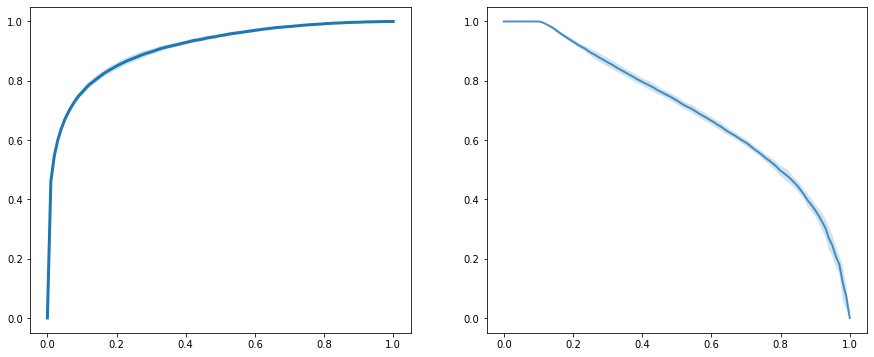

In [89]:
fig, axs = plt.subplots(1, 2, figsize = (15,6)) # create a figure for both AUC plots
ax_roc, ax_pr = axs # split the plots
ax_roc.plot(mean_vals, mean_tpr, 
label=f'(AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})', lw=3) # plot the AUROC
ax_roc.fill_between(mean_vals, tprs_lower, tprs_upper, alpha=.2) # plot the standard deviation of AUROC
ax_pr.plot(mean_vals, mean_precision, 
label=f'(AUPRC = {mean_auprc:.2f} $\pm$ {std_auprc:.2f})',
lw=2, alpha=.8)    # plot the AUPRC
ax_pr.fill_between(mean_vals, precisions_lower, precisions_upper, alpha=.2) # plot the standard deviation of AUPRC

In [92]:
model_name = 'XGBoost'
prediction_comparisons = ['AF','AF_cardiac_surgical','AF_non_cardiac_surgical']

In [95]:


def get_metrics(results_path, axs, comparison, model_name, grouping, predict):
    ax_roc, ax_pr = axs # split the plots
    auc_df = pd.read_csv(f'{results_path}/{comparison}/grouping={grouping}_predict={predict}/{model_name}/auc.csv', index_col=0)
    precision_df = pd.read_csv(f'{results_path}/{comparison}/grouping={grouping}_predict={predict}/{model_name}/precision.csv', index_col=0)
    tpr_df = pd.read_csv(f'{results_path}/{comparison}/grouping={grouping}_predict={predict}/{model_name}/tpr.csv', index_col=0)
    
    aucs = auc_df['auc'].tolist()
    auprcs = auc_df['auprc'].tolist()
    
    precisions_lower = precision_df['precisions_lower'].tolist()
    mean_precision = precision_df['mean_precision'].tolist()
    precisions_upper = precision_df['precisions_upper'].tolist()

    tprs_lower = tpr_df['tprs_lower'].tolist()
    mean_tpr = tpr_df['mean_tpr'].tolist()
    tprs_upper = tpr_df['tprs_upper'].tolist()
    plot_metrics(axs, mean_tpr,tprs_lower, tprs_upper, mean_precision, precisions_lower, precisions_upper, mean_auc, std_auc, mean_auprc, std_auprc)
    
    ax_roc.plot(mean_vals, mean_tpr, label=f'(AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})', lw=3) # plot the AUROC
    ax_roc.fill_between(mean_vals, tprs_lower, tprs_upper, alpha=.2) # plot the standard deviation of AUROC
    ax_pr.plot(mean_vals, mean_precision,label=f'(AUPRC = {mean_auprc:.2f} $\pm$ {std_auprc:.2f})', lw=2, alpha=.8)    # plot the AUPRC
    ax_pr.fill_between(mean_vals, precisions_lower, precisions_upper, alpha=.2) # plot the standard deviation of AUPRC

KeyError: 'auc'

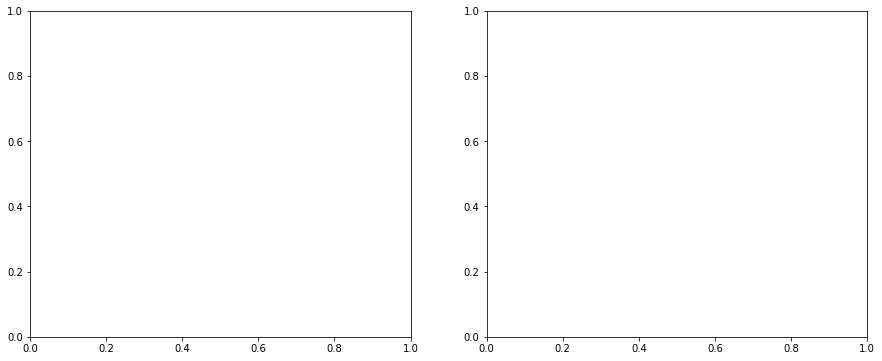

In [96]:
fig, axs = plt.subplots(1, 2, figsize = (15,6)) # create a figure for both AUC plots
for comparison in prediction_comparisons:
    get_metrics(results_path = 'results/', axs = axs, comparison = comparison, model_name = 'XGBoost', grouping = 2, predict = 6)